# Lecture 6 Evaluation
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron, Chapter 3, pp. 89-97
* [*Loss Functions in Machine Learning Explained*, DataCamp article](https://www.datacamp.com/tutorial/loss-function-in-machine-learning)

## Categorical Evaluations

Ultimately, either your model worked or it didn't. We can break this evaluation into multiple key metrics:
* Accuracy - Fraction of correct predictions
  $$ accuracy = \frac{\#~correct}{\#~of~predictions}$$
  * Good choice for balanced classes (equal numbers of different options)
  * Not a good choice for unbalanced classes
    * Predict 100 pictures to be dogs - If 99 are dogs, that's 99% accuracy!
* Recall
  * Ability of a model to find all relevant cases
$$recall = \frac{\#~true~positives}{\#~true~positives + \#~false~negatives}$$
* Precision
  * Ability to identify only the relevant cases
$$precision = \frac{\#~true~positives}{\#~true~positives + \#~false~positives}$$
* F1-Score
  * Harmonic mean of precision and recall
$$F_1 = 2*\frac{precision\cdot recall}{precision + recall}$$

__Confusion Matrix__

| Total Population | Prediction Positive | Prediction Negative |
| ---: | :---: | :---: |
| Condition Positive | True Positive (TP) | False Negative (FN)<br>(Type II error) |
| Condition Negative | False Positive (FP)<br>(Type I error) | True Negative (TN) |

Prevalence, True Positive Rate (TPR), False Positive Rate (FPR), etc.
* https://en.wikipedia.org/wiki/Confusion_matrix

The method used depends on the situation.
* Situation determines if we fix the false positives or the false negatives

Let's see an example of using the confusion matrix.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#####   Create Data   #####
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.8,random_state=32)
# If you want clearer clusters, decrease cluster_std

display(data[0]) # The points
display(data[1]) # The original cluster

array([[  9.91650127,  -3.77063035],
       [  1.12200139,  -1.32083979],
       [ -1.23546385,   1.59821056],
       [ -0.43787151,  11.47588013],
       [ -6.52116412,   8.93661357],
       [  3.04318553,   0.99490027],
       [  3.36799787,  10.06559543],
       [ -9.65660013,   6.35249626],
       [-10.5356547 ,   7.87913996],
       [ -1.08886003,   9.83904956],
       [  7.41274486,  -2.87938361],
       [  0.59732514,   7.02549602],
       [  0.56641693,   2.18270924],
       [  9.74371385,  -3.1680344 ],
       [  4.89153226,   6.86663706],
       [ -1.13400693,   5.1335751 ],
       [  3.35475109,  -0.55215171],
       [ -7.70026323,   6.92501535],
       [ -9.30167409,   6.85720175],
       [  1.57475151,   6.21014355],
       [  7.29018515,  -4.52240862],
       [ -8.1910217 ,   9.1644131 ],
       [-10.51828412,   7.2250034 ],
       [  9.36444924,   5.62672991],
       [  7.13838466,   7.24158376],
       [ -1.14645948,  -1.25553689],
       [  7.01770556,  -0.89525929],
 

array([0, 4, 4, 1, 3, 4, 1, 3, 3, 1, 0, 1, 4, 0, 2, 4, 4, 3, 3, 2, 0, 3,
       3, 2, 2, 4, 0, 2, 0, 0, 2, 3, 2, 0, 0, 2, 1, 3, 2, 4, 4, 2, 3, 1,
       1, 3, 4, 1, 1, 0, 4, 3, 0, 4, 3, 1, 0, 1, 1, 3, 2, 4, 4, 2, 2, 2,
       0, 4, 3, 2, 4, 0, 0, 3, 4, 3, 3, 4, 1, 0, 3, 2, 3, 4, 2, 1, 1, 0,
       4, 2, 3, 4, 1, 3, 2, 1, 4, 1, 1, 3, 3, 2, 2, 3, 1, 2, 0, 0, 2, 1,
       4, 2, 3, 0, 3, 3, 1, 1, 0, 4, 0, 2, 3, 0, 1, 0, 1, 3, 1, 4, 1, 0,
       0, 0, 3, 4, 2, 4, 2, 0, 2, 4, 2, 1, 2, 2, 1, 2, 4, 2, 2, 3, 2, 3,
       1, 1, 1, 0, 2, 4, 3, 1, 4, 0, 0, 0, 1, 0, 0, 2, 3, 0, 2, 4, 3, 3,
       4, 4, 4, 0, 0, 0, 3, 2, 1, 0, 1, 4, 1, 3, 1, 2, 1, 4, 0, 1, 4, 4,
       4, 3])

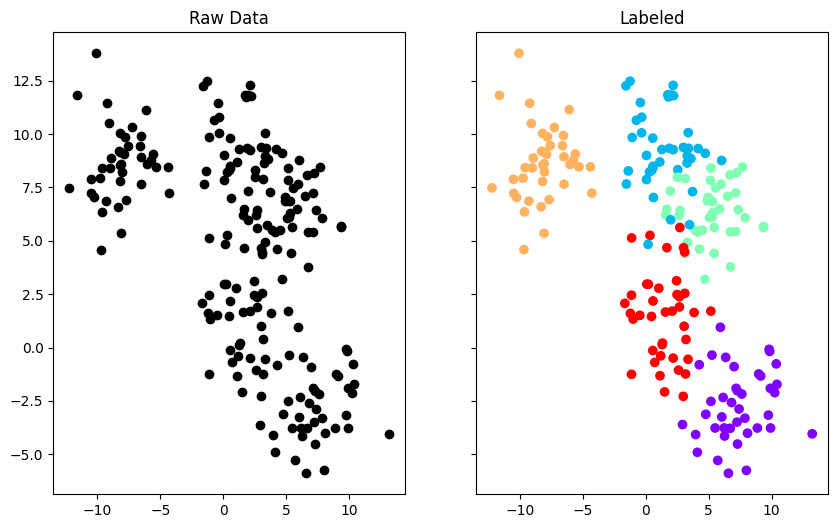

In [3]:
# Plot the data (with labels)
#   * Note: This is unsupervised learning, so we won't normally have labels.
#   * This is just a convenience for testing the program.
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Raw Data')
ax1.scatter(data[0][:,0],data[0][:,1],color='black')
ax2.set_title("Labeled")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

/home/meo/.virtualenvs/MachineLearning/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 7.43387197 -2.77020191]
 [ 1.17220128  9.09164619]
 [-8.13852276  8.63465234]
 [ 1.51008942  1.0635017 ]
 [ 5.33998906  6.27095687]]


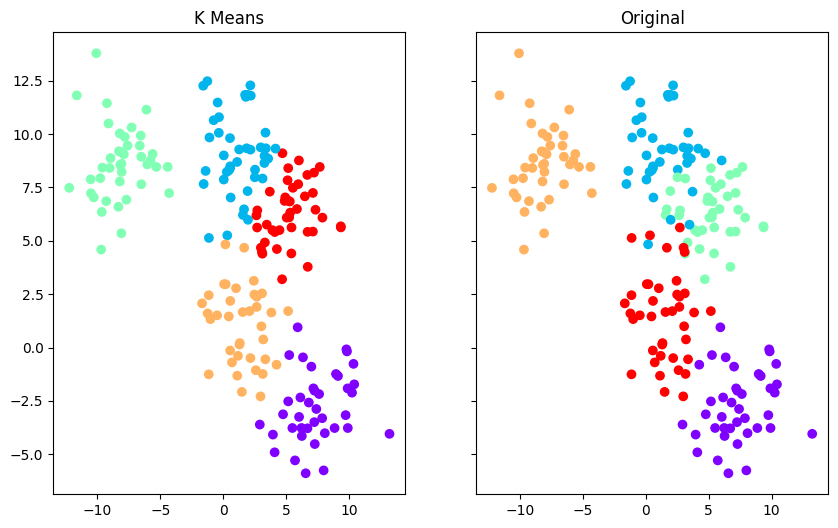

In [4]:
#####   MODEL THE DATA   #####
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data[0])

# Where are the centroids?
print(kmeans.cluster_centers_)

# Display our clusters
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
#ax1.scatter(kmeans.cluster_centers_)
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [5]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(data[1],kmeans.labels_))

[[39  0  0  1  0]
 [ 0 35  0  1  4]
 [ 0  5  0  0 35]
 [ 0  0 40  0  0]
 [ 0  2  0 35  3]]


In [6]:
kmeans_map = {  # Model:Actual
    0:0,
    2:1,
    3:2,
    1:3,
    4:4
}

In [ ]:
data[1]

In [ ]:
kmeans.labels_

In [ ]:
import pandas as pd
target_relabeled = pd.Series(data[1]).map(kmeans_map).values
target_relabeled

In [7]:
from sklearn.metrics import precision_score, recall_score

pscore = precision_score(data[1], kmeans.labels_, average=None)
rscore = recall_score(data[1], kmeans.labels_, average=None)
print(f"Precision Score = {pscore}    Recall Score = {rscore}")

Precision Score = [1.         0.83333333 0.         0.         0.07142857]    Recall Score = [0.975 0.875 0.    0.    0.075]


In [11]:
pscore = precision_score(target_relabeled, kmeans.labels_, average=None)
rscore = recall_score(target_relabeled, kmeans.labels_, average=None)
print(f"Precision Score = {pscore}")
print(f"   Recall Score = {rscore}")

Precision Score = [1.         0.11904762 1.         0.02702703 0.07142857]
   Recall Score = [0.975 0.125 1.    0.025 0.075]


In [14]:
from sklearn.metrics import classification_report

print(classification_report(target_relabeled, kmeans.labels_))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.12      0.12      0.12        40
           2       1.00      1.00      1.00        40
           3       0.03      0.03      0.03        40
           4       0.07      0.07      0.07        40

    accuracy                           0.44       200
   macro avg       0.44      0.44      0.44       200
weighted avg       0.44      0.44      0.44       200



## Quantitative Evaluation and Loss Functions

For numerical data, we want to see how far the predicted values ($\hat{y}_i$) from the model ($y_i$) are from the true value. 

* Mean Absolute Error (MAE) or L1 Loss
* Mean Squared Error (MSE) or L2 Loss
* Root Mean Squared Error (RMSE)
* Binary Cross-Entropy Loss or Log Loss

$$MAE=\frac{1}{n}\sum_i |\hat{y}_i-y_i| \qquad MSE=\frac{1}{n}\sum_i (\hat{y}_i-y_1)^2 \qquad RMSE=\sqrt{MSE}$$